In [1]:
# Analyse des signaux téléchargés
%matplotlib notebook
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.dates as mdates
from matplotlib import pyplot as plt
from scipy import signal
from scipy.io import wavfile
import glob
import soundfile as sf
import os

In [2]:
!pip install soundfile

In [3]:
# chemin vers signaux du premier type collier
dossier_collier = os.path.expanduser("ARIA/cours/signal/projet/signal/carduelis")
pattern_wav = os.path.join(dossier_collier, "*.wav")
pattern_mp3 = os.path.join(dossier_collier, "*.mp3")
fichiers1_wav = glob.glob(pattern_wav)
fichiers1_mp3 = glob.glob(pattern_mp3)

In [4]:
# chemin vers signaux du type carduelis
dossier_carduelis = os.path.expanduser("ARIA/cours/signal/projet/signal/collier")
pattern_wav = os.path.join(dossier_carduelis, "*.wav")
pattern_mp3 = os.path.join(dossier_carduelis, "*.mp3")
fichiers2_wav = glob.glob(pattern_wav)
fichiers2_mp3 = glob.glob(pattern_mp3)

In [5]:
# créer un fichier avec tous les signaux mélangés
po=[]
Fs=[]
MP3=fichiers2_mp3+fichiers1_mp3
WAV=fichiers2_wav+fichiers1_wav 
for i in MP3:
    pi, fs = sf.read(i)
    if pi.ndim == 2:  # Si le signal est stéréo (2D)
        left = pi[:, 0]  # Canal gauche
        po.append(left)
    else:  # Si le signal est mono (1D)
        po.append(pi)
    Fs.append(fs)
for i in WAV:
    fs,pi = wavfile.read(i)
    if pi.ndim == 2:  # Si le signal est stéréo (2D)
        left = pi[:, 0]  # Canal gauche
        po.append(left)
    else:  # Si le signal est mono (1D)
        po.append(pi)
    Fs.append(fs)

/var/folders/ty/tdfgymfs5x5cfpsggj0tglpr0000gn/T/ipykernel_43689/928239132.py:15: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs,pi = wavfile.read(i)


In [6]:
def band_pass_filter(x,fc,Fs):
    wc=tuple(x/(Fs/2) for x in fc)
    b, a = signal.butter(4, wc, 'bandpass')
    y = signal.filtfilt(b, a, x)
    return y

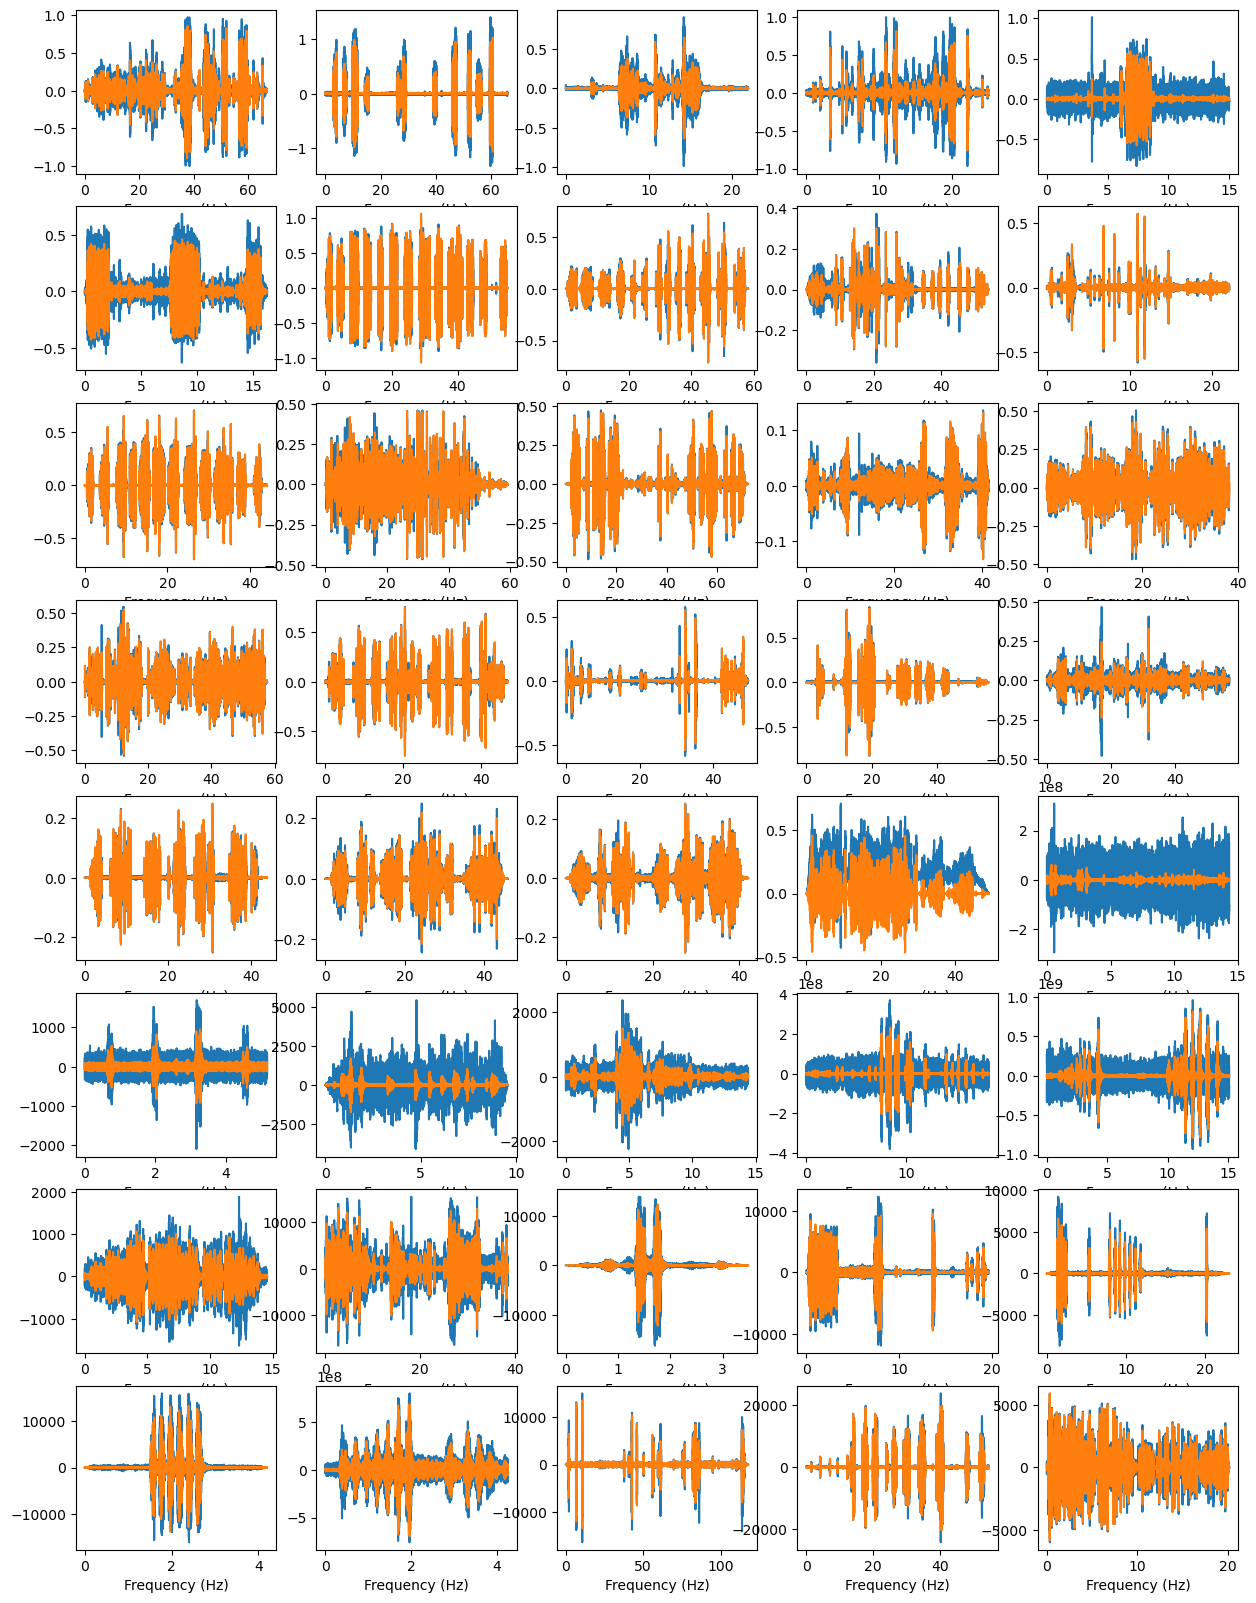

In [7]:
# Créer une figure avec 8 lignes et 5 colonnes
plt.figure(figsize=(15, 20))
fc=(3500,6000)
filtré=[]
for i in range(len(Fs)):
    y=band_pass_filter(po[i],fc,Fs[i])
    plt.subplot(8, 5, i + 1)
    N=len(po[i])
    t=np.arange(N)/Fs[i]
    plt.plot(t,po[i])
    plt.plot(t,y)
    plt.xlabel('Frequency (Hz)')
    filtré.append(y)
    
plt.show()

In [8]:
# extraire la partie positive du signal
def positif(F):
    Y=[]
    for n in range(len(F)):
        x=F[n]
        p=np.zeros(len(x))
        for i in range(len(x)):
            if x[i] >= 0:
                p[i]=x[i]
        Y.append(p)
    return Y

In [9]:
Y=positif(filtré)
len(Y)

40

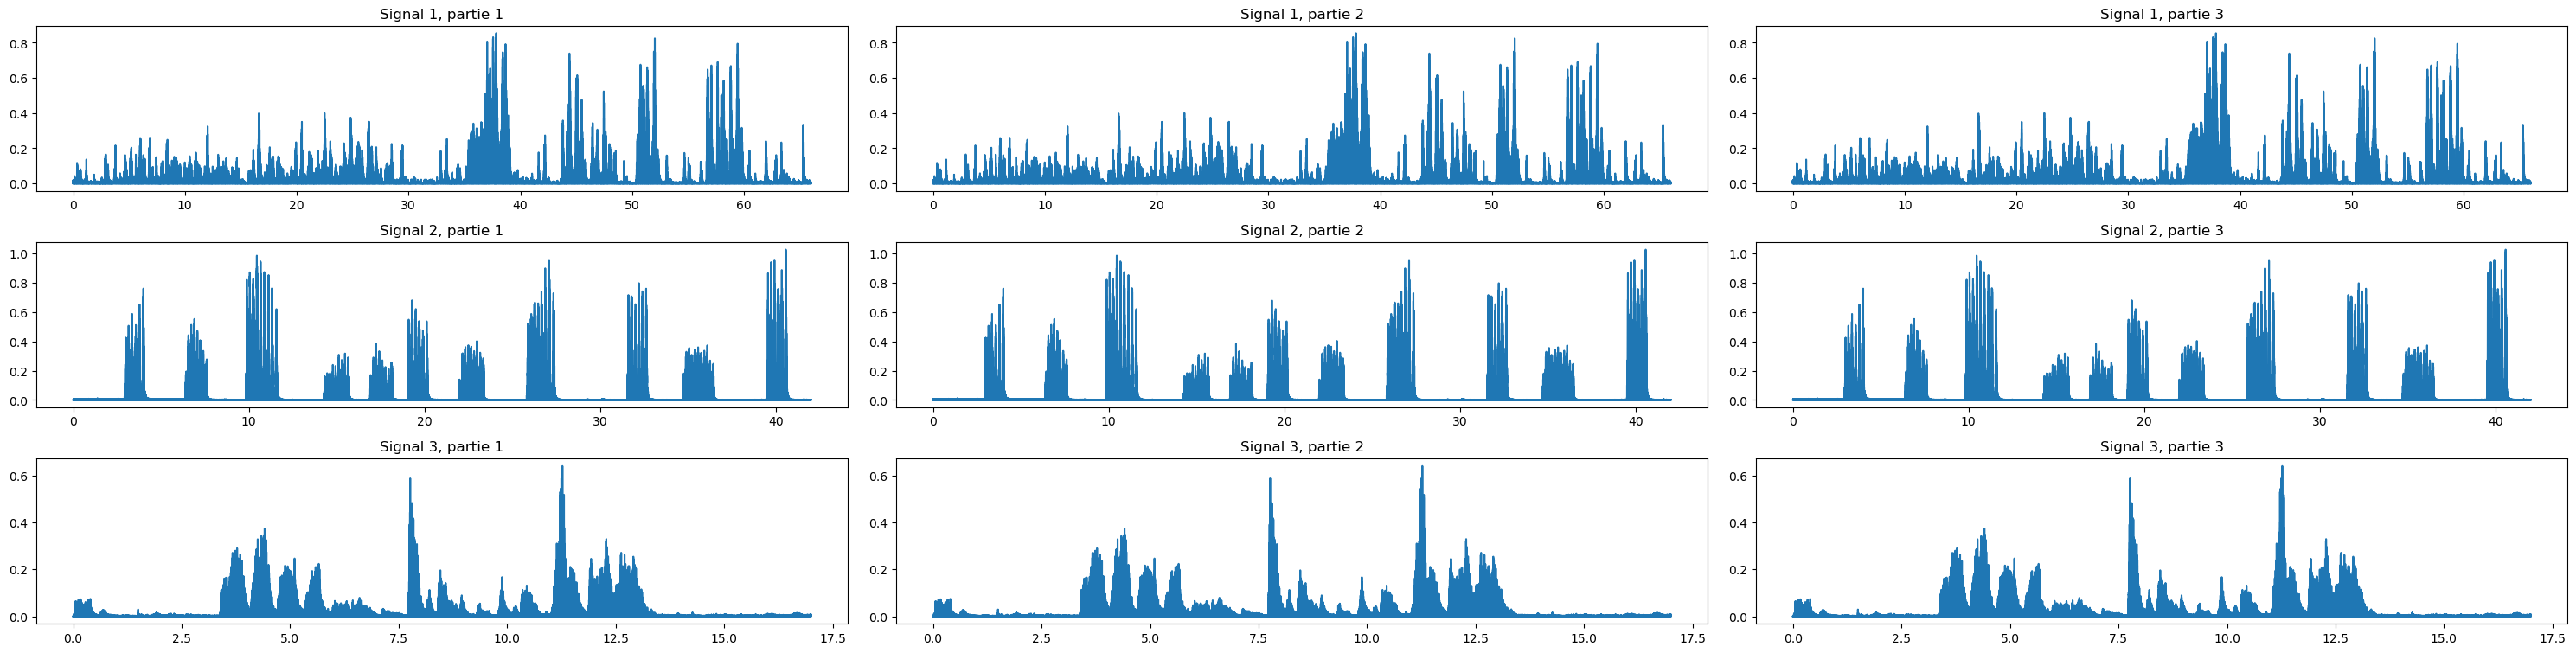

In [177]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 100))
for i in range(3):
    for j in range(3):  # 3 signaux par i
        plt.subplot(len(Fs), 3, i*3 + j + 1)  # index unique pour chaque subplot
        fs = Fs[i]
        pi = Temps[j][i]
        N = len(pi)
        t = np.arange(N) / fs
        plt.plot(t, pi)
        plt.title(f"Signal {i+1}, partie {j+1}")
plt.tight_layout()
plt.show()

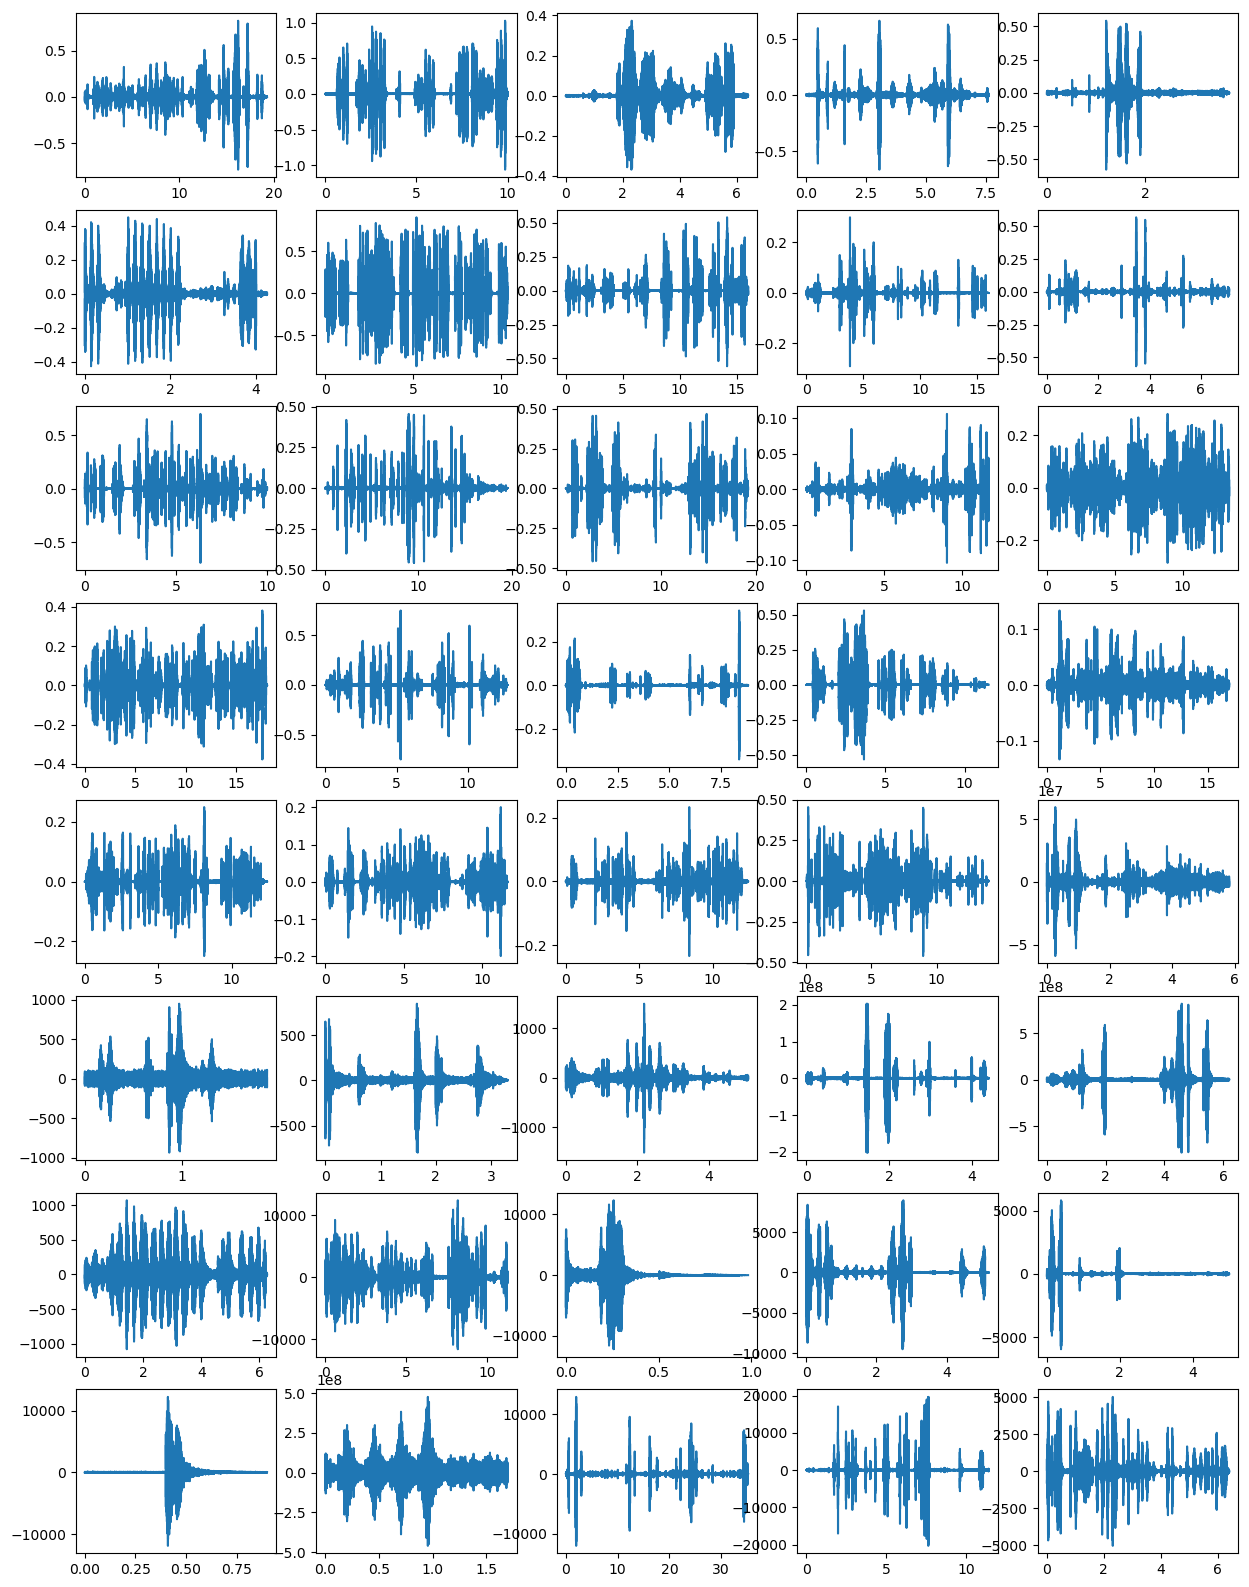

In [319]:
# Créer une figure avec 8 lignes et 5 colonnes
plt.figure(figsize=(15, 20))
for i in range(len(Fs)):
    plt.subplot(8, 5, i + 1)
    fs=Fs[i]
    pi=Temps[2][i]
    #pi=Y[i]
    N=len(pi)
    t=np.arange(N)/fs
    plt.plot(t,pi)
plt.show()

In [31]:

# Y contient les 40 signaux partie positive
def fonction(Q,S,F):
    Temps=[]
    Sign=[]
    coupe=positif(F)
    Signal = [f.copy() for f in F]
    C=[[] for _ in range(len(Fs))]
    q=0
    u=0
    clivage=[]
    for o in Q: # différentes longueur de temps
        Temps.append(coupe)
        Sign.append(Signal)
        clivage.append(C)
        coupe=Temps[q].copy()
        Signal=Sign[q].copy()
        C=clivage[q].copy()
        q=q+1
        for n in range(len(Fs)): # pour chaque signal
            X=coupe[n] # siganl modifié
            P=Signal[n]
            T=int(Fs[n]*o) # longueur du temps
            m=np.zeros(len(X)//T+1) 
            for i in range(len(X)//T+1):
                if len(X[i*T:T*(i+1)])==0:
                    m[i]=0
                else:
                    moy=np.mean(X[i*T:T*(i+1)])
                    m[i]=moy
            coupure=[]
            cli=[]
            seuil = np.mean(m) * S
            for l in range (len(m)):
                if m[l]>seuil:
                    coupure.append(l)
                else:
                    cli.append(l)
            X2 = [X[i*T : (i+1)*T] for i in coupure]
            Si2 = [P[i*T : (i+1)*T] for i in coupure]
            C[n].extend([(i*T, (i+1)*T) for i in cli])
            X= np.concatenate(X2) # signal après recolage
            P= np.concatenate(Si2) # signal après recolage
            coupe[n]=X
            Signal[n]=P
        u=u+1
    return Temps,clivage,Sign



In [21]:
Temps,clivage,Sign=fonction([0.5,0.4],0.1,filtré)
len(Sign[0])

40

In [30]:
print(clivage[1][0])
print(clivage[0][0])

[(1411200, 1433250), (1896300, 1918350), (2182950, 2205000), (2359350, 2381400), (2381400, 2403450), (2447550, 2469600), (2910600, 2932650), (2932650, 2954700), (670320, 687960), (1323000, 1340640), (1358280, 1375920), (2134440, 2152080), (2575440, 2593080), (2716560, 2734200)]
[(1411200, 1433250), (1896300, 1918350), (2182950, 2205000), (2359350, 2381400), (2381400, 2403450), (2447550, 2469600), (2910600, 2932650), (2932650, 2954700), (670320, 687960), (1323000, 1340640), (1358280, 1375920), (2134440, 2152080), (2575440, 2593080), (2716560, 2734200)]


2954276
2690100
3164544
1176000
968655
463050
1106094
1106094
720796
504000
716889
639450
2643869
2064000
2563200
1874250
2591771
2303771
1057890
1057890
1946559
1786050
2840302
2640000
3468263
2280000
1826522
1826522
1681725
1681725
2538149
2359350
2250740
1728000
2178570
1212750
2457216
926100
2722297
2722297
2101261
1416000
2026908
1675800
2016998
1776000
2353536
1800000
458218
458218
248320
248320
421001
421001
635077
635077
877881
805881
483260
320000
642108
617400
1695589
1320739
153600
88200
866649
551250
1017856
463050
185220
66150
135906
135906
5191680
4740750
2403280
904050
887710
887710


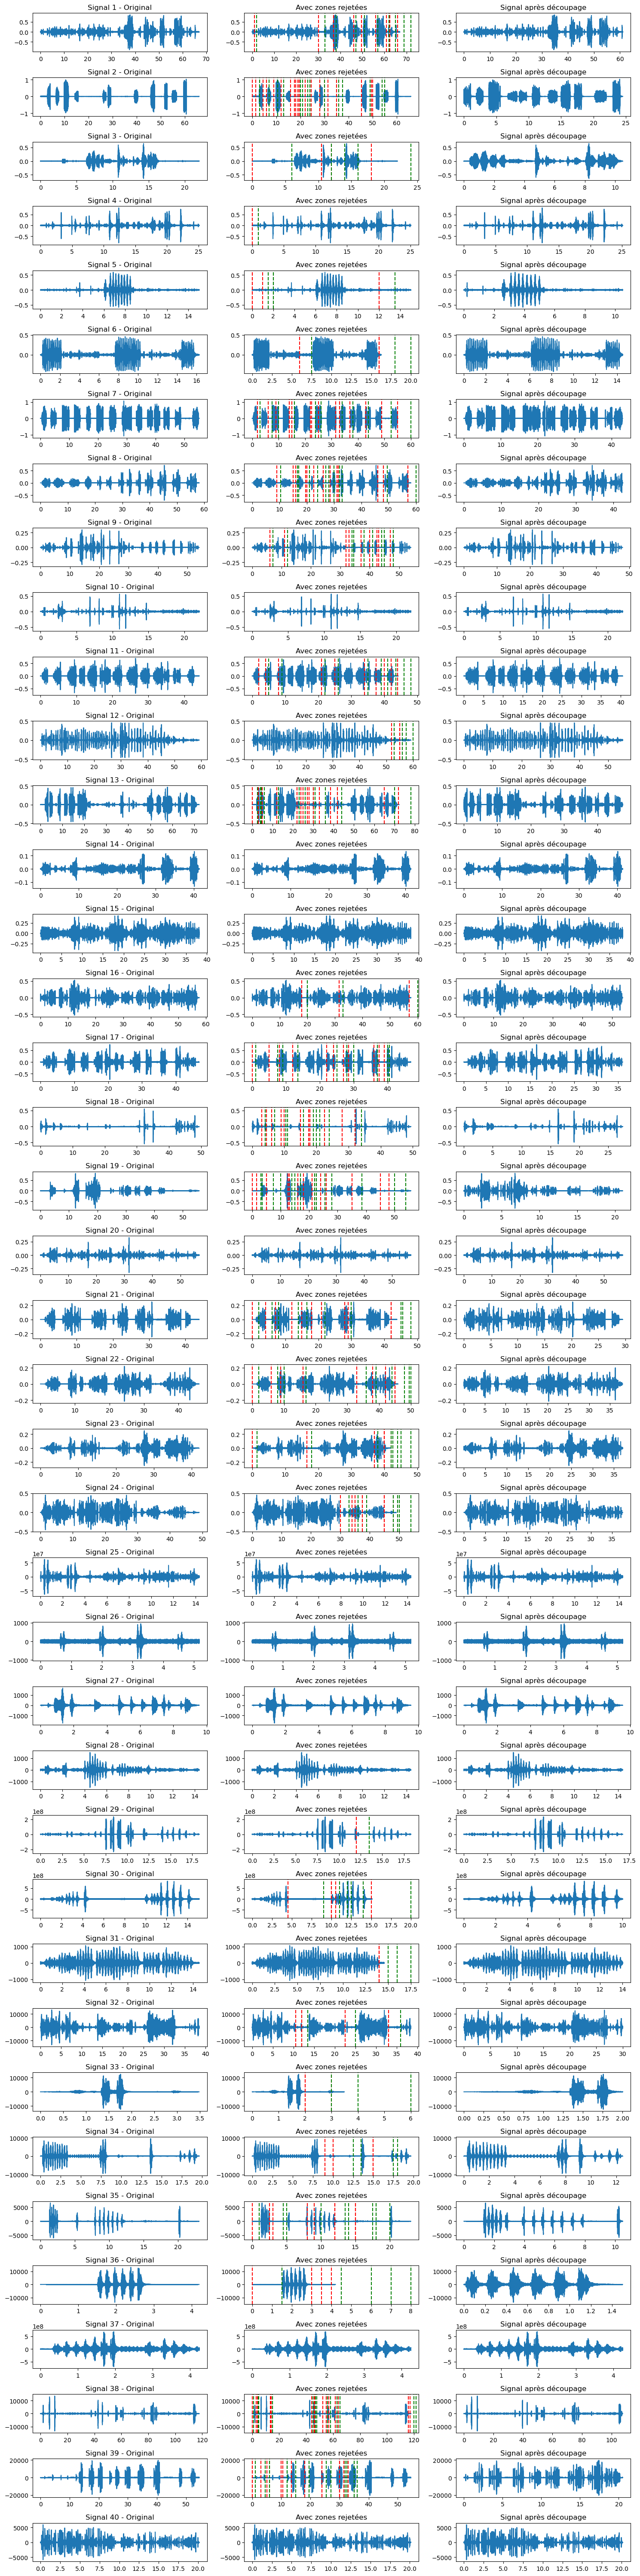

In [40]:
# affiche les signaux originaux et les coupures réalisées par la fonction pour un temps
Temps,clivage,Sign=fonction([6,5,4.5,4,3.5,3,2.5,2,1.5,1],0.2,filtré)
plt.figure(figsize=(15, 60))
for i in range(len(Fs)):
    plt.subplot(40, 3, i * 3 + 1)
    # affiche le signal nature
    fs=Fs[i]
    pi=filtré[i]
    print(len(filtré[i]))
    t=np.arange(len(pi))/fs
    plt.plot(t,pi)
    plt.title(f"Signal {i+1} - Original")
    # affiche le signal avec les ruptures
    plt.subplot(40, 3, i * 3 + 2)
    plt.plot(t,pi)
    plt.title("Avec zones rejetées")
    for p in range(len(clivage[9][i])):
        x1,x2= clivage[9][i][p]
        x1,x2=x1/fs,x2/fs
        plt.axvline(x=x1, color='red', linestyle='--')
        plt.axvline(x=x2, color='green', linestyle='--')
     # affiche le signal découpé
    plt.subplot(40, 3, i * 3 + 3) 
    pi=Sign[9][i]
    print(len(Sign[9][i]))
    t=np.arange(len(pi))/fs
    plt.title("Signal après découpage")
    plt.plot(t,pi)
     # affiche le signal découpé
    #plt.subplot(40, 3, i * 3 + 3) 
    #pi=Temps[0][i]
    #t=np.arange(len(pi))/fs
   # plt.title("Signal après découpage")
   # plt.plot(t,pi)
plt.tight_layout()
plt.show()

In [481]:
pi=filtré[0]
len(pi)

2954276

In [484]:
fs=Fs[0]
t=np.arange(len(pi))
len(t)

2954276

(1.5, 2.0)
(2.0, 2.5)
(30.0, 30.5)
(39.0, 39.5)
(40.5, 41.0)


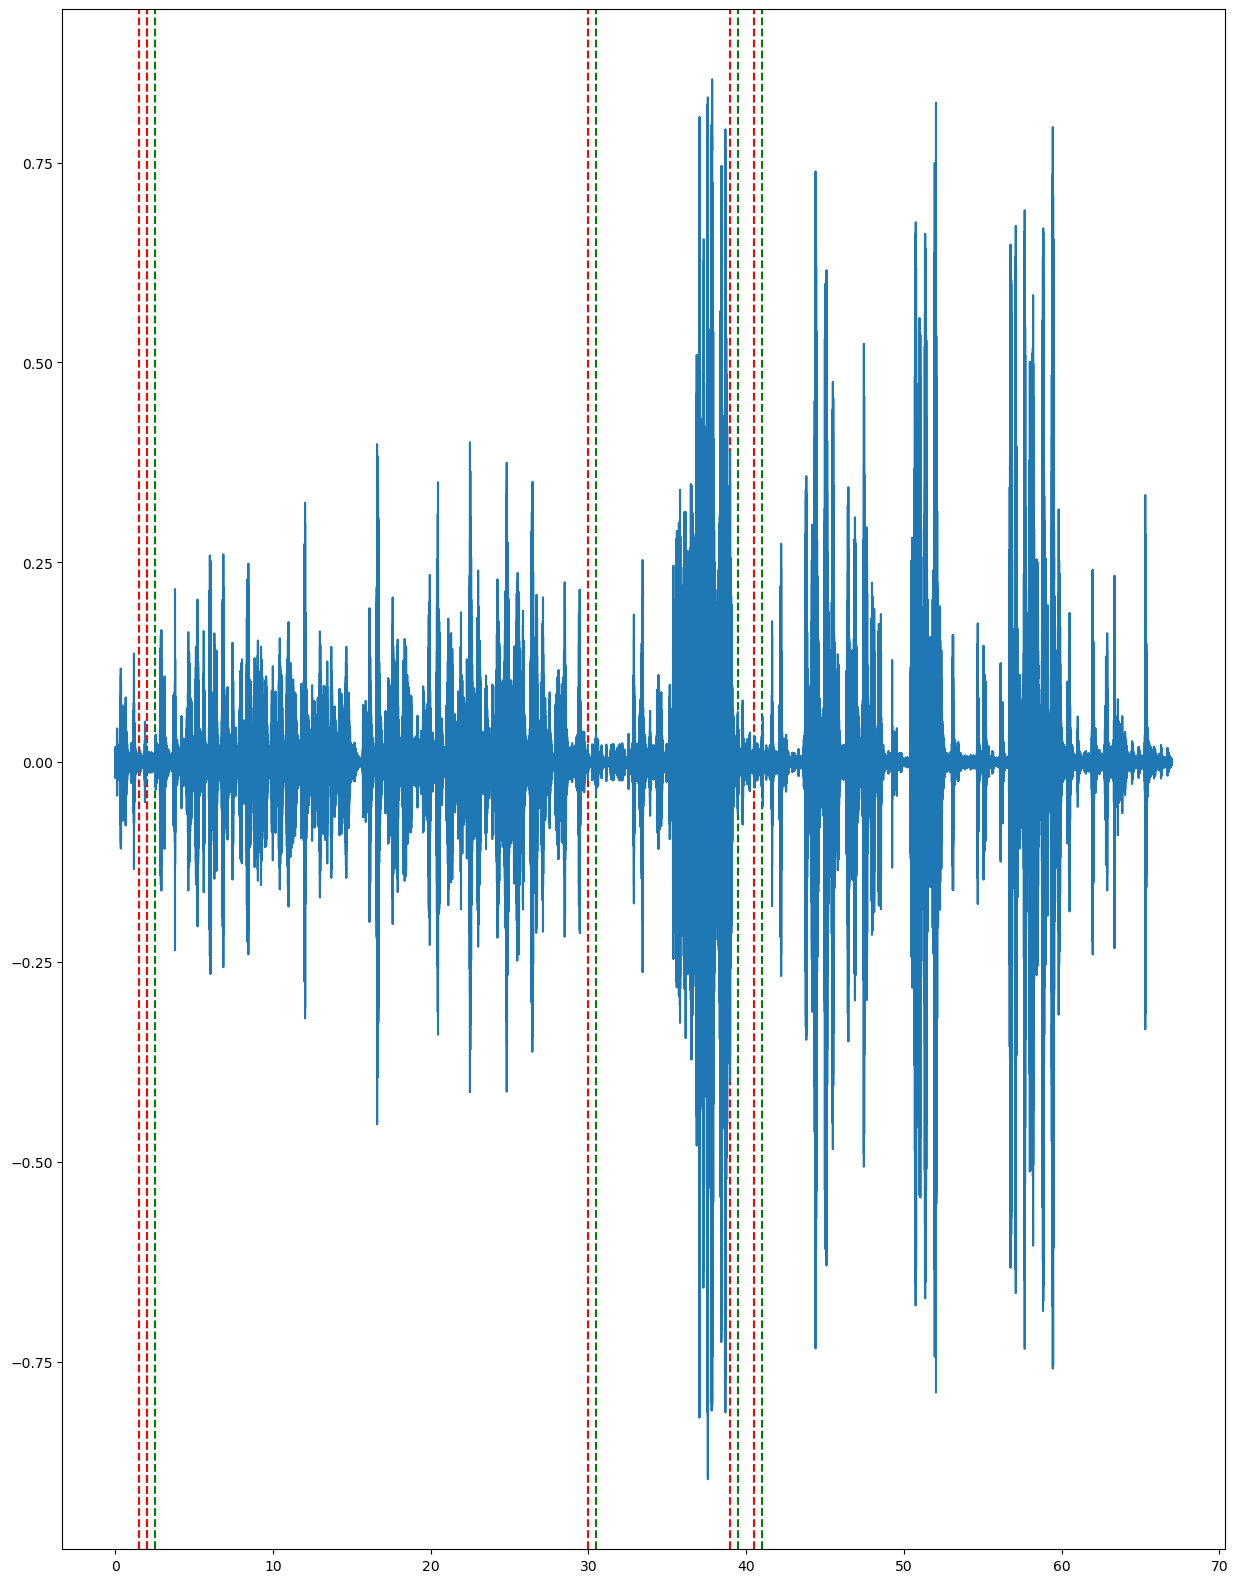

In [505]:
# affiche les signaux originaux et les coupures réalisées par la fonction
plt.figure(figsize=(15, 20))
fs=Fs[0]
Temps,clivage=fonction([1,0.5],0.15,Y)
#pi=Temps[0][0]
pi=filtré[0]
for i in range(len(clivage[0][0])):
    x1,x2= clivage[1][0][i]
    x1,x2=x1/fs,x2/fs
    print((x1,x2))
    plt.axvline(x=x1, color='red', linestyle='--')
    plt.axvline(x=x2, color='green', linestyle='--')
    t=np.arange(len(pi))/fs
plt.plot(t,pi)
plt.show()

In [384]:
clivage[0]

[]